In [9]:
from pysat.examples.genhard import PHP
import os, sys
local_cpmpy_path = os.path.abspath(os.getcwd().replace("examples/advanced", ""))

if local_cpmpy_path not in sys.path:
    sys.path.insert(0, local_cpmpy_path)

import cpmpy
from cpmpy import *
from cpmpy.solvers.ortools import CPM_ortools
from cpmpy.solvers.pysat_rc2 import CPM_RC2

from time import time

import matplotlib.pyplot as plt

# Generate difficult Pigeon Hole Principle instances

In [10]:
def time_rc2(model):
    rc2_solver = CPM_RC2(model)
    tsolve = time()
    s = rc2_solver.solve()
    tsolve = time() - tsolve
    return tsolve

def time_ortools(model):
    ortools_solver = CPM_ortools(model)
    tsolve = time()
    s = ortools_solver.solve()
    tsolve = time() - tsolve
    return tsolve

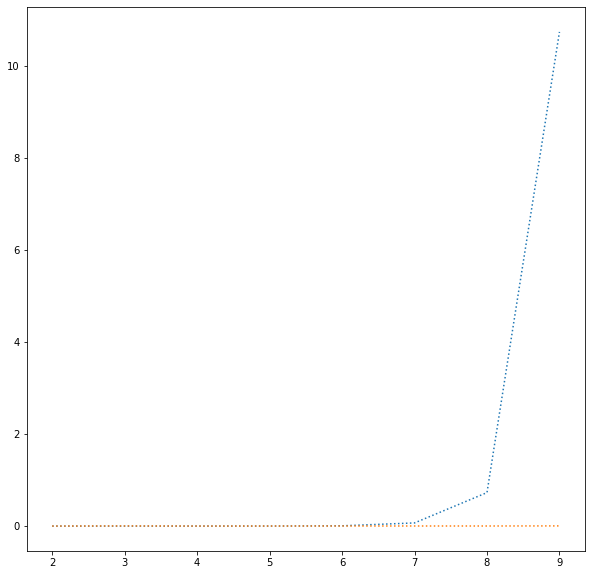

In [17]:
exec_time_rc2 = []
exec_time_ortools = []
x = []
for i in range(2, 10):
    cnf = PHP(i)
    clauses = cnf.clauses
    nv = cnf.nv
    vars = boolvar(shape=nv)
    constraints = []
    for clause in clauses:
        constraints += [any(vars[i-1] if i > 0 else ~vars[(i*-1)-1] for i in clause)]
    m = Model(constraints)

    exec_time_rc2.append(time_rc2(m))
    exec_time_ortools.append(time_ortools(m))
    x.append(i)

plt.figure(figsize=(10, 10))
plt.plot(x, exec_time_rc2, label="rc2-php", linestyle = 'dotted')
plt.plot(x, exec_time_ortools, label="ortools-php", linestyle = 'dotted')
plt.show()
